In [1]:
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install bs4

In [3]:
from bs4 import BeautifulSoup

In [4]:
url = "https://www.makaan.com/bangalore-residential-property/buy-property-in-bangalore-city?_=1672749384506"

In [5]:
url

'https://www.makaan.com/bangalore-residential-property/buy-property-in-bangalore-city?_=1672749384506'

In [6]:
page = requests.get(url)
page

<Response [200]>

In [7]:
page.text

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>Property for Sale in Bangalore | 45794+ Bangalore Properties for sale</title><meta name="description" content="Find 45794+ Properties for sale in Bangalore on Makaan.com. Search &#10003;4656+ Houses/Villas for sale. &#10003;5586+ New Projects. &#10003;27755+ Apartments for sale. Book Now !"><meta name="keywords" content="Buy Bangalore Properties, Residential Property for sale in Bangalore, Property for sale in Bangalore, Bangalore Property Sale"><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="country" content="India"><meta name="og:type" content="website"><meta name="og:site_name" content="Makaan.com"><meta name="og:image:url" content="http://static.makaan.com/6/2/355/7975867.jpeg"><meta name="viewp

In [8]:
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Sale in Bangalore | 45794+ Bangalore Properties for sale</title><meta content="Find 45794+ Properties for sale in Bangalore on Makaan.com. Search ✓4656+ Houses/Villas for sale. ✓5586+ New Projects. ✓27755+ Apartments for sale. Book Now !" name="description"/><meta content="Buy Bangalore Properties, Residential Property for sale in Bangalore, Property for sale in Bangalore, Bangalore Property Sale" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/2/355/7975867.jpeg" name="og:image:url"/><meta content="minimum-scale

In [9]:
b=soup.find_all('a',attrs={'class':'seller-name'})


In [10]:
builder=[]
for i in b:
     builder.append(i.text)
builder        

['VBHC Value Homes',
 'Parivar Housing Corporation',
 'Casagrand Builder Private Limited',
 'Suraksha Group',
 'Kumar Properties',
 'Bavisha Homes Private Limited',
 'Abhi Infra',
 'Pratham Constructions',
 'Assetz Property Group',
 'Sairam Dwellings',
 'Saroj Group',
 'MAA HOMES',
 'Annciya Projects LLP',
 'Ambika Developers',
 'Iconhomz',
 'Saroj Ventures',
 'Guru Punvaanii Properties',
 'DSR Infrastructure Pvt Ltd',
 'Navami Builders and Developers',
 'Bluejay Enterprises']

In [11]:
per_sqft=soup.find_all('td',attrs={'class':'lbl rate'})


In [12]:
price_sqft=[]
for i in per_sqft:
    price_sqft.append(i.text)
price_sqft

['5,321 / sq ft',
 '5,999 / sq ft',
 '5,793 / sq ft',
 '7,197 / sq ft',
 '8,015 / sq ft',
 '4,900 / sq ft',
 '4,613 / sq ft',
 '9,787 / sq ft',
 '7,260 / sq ft',
 '5,492 / sq ft',
 '6,577 / sq ft',
 '7,184 / sq ft',
 '6,533 / sq ft',
 '2,349 / sq ft',
 '4,300 / sq ft',
 '1,615 / sq ft',
 '2,000 / sq ft',
 '6,691 / sq ft',
 '8,133 / sq ft',
 '3,300 / sq ft']

In [13]:
a=soup.find_all('td',attrs={'class':'size'})

In [14]:
area=[]
for i in a:
    area.append(i.text)
area

['902 ',
 '1140 ',
 '2037 ',
 '1026 ',
 '1146 ',
 '854 ',
 '1535 ',
 '1285 ',
 '1212 ',
 '1220 ',
 '1110 ',
 '2687 ',
 '1500 ',
 '1350 ',
 '1211 ',
 '2000 ',
 '1500 ',
 '1239 ',
 '1641 ',
 '1945 ']

In [15]:
p=soup.find_all('span',attrs={'class':'val','itemprop':'offers'})

In [16]:
price=[]
for i in p:
    price.append(i.text)
price

['48',
 '68.38',
 '1.18',
 '73.85',
 '91.85',
 '41.84',
 '70.81',
 '1.25',
 '88',
 '67',
 '73.01',
 '1.93',
 '97.99',
 '31.71',
 '52.07',
 '32.3',
 '30',
 '82.9',
 '1.33',
 '64.18']

In [17]:
loc=soup.find_all('span',attrs={'itemprop':'addressLocality'})

In [18]:
location=[]
for i in loc:
    location.append((i).text)
location

['Kumbalgodu',
 'Varthur',
 'Krishnarajapura',
 'Begur',
 'Hennur',
 'Sompura',
 'Gunjur',
 'Yeshwantpur',
 'Begur',
 'Kengeri',
 'Whitefield Hope Farm Junction',
 'Chandapura',
 'Electronic City Phase 1',
 'Devanahalli',
 'Bommasandra',
 'Karudabande Hosahalli',
 'Anekal City',
 'Chikkanayakanahalli at Off Sarjapur',
 'RR Nagar',
 'Devanahalli']

In [19]:
con_status=soup.find_all('td',attrs={'class':'val'})
building_status=[]
for i in con_status:
    building_status.append(i.text)
building_status

['Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Ready to move',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Ready to move',
 'New',
 'New',
 'New',
 'New',
 'Under Construction',
 'Under Construction',
 'New']

In [20]:
flat=[]
h=[]
flat1=soup.find_all('div',class_="title-line")
for i in flat1:
    h.append(i.find("span",class_="val"))
for i in h:
        if i is None:
            flat.append(np.NaN)
        else:
            flat.append(i.text)

In [21]:
flat

['2 ',
 '2 ',
 '3 ',
 '2 ',
 '2 ',
 '2 ',
 '3 ',
 '2 ',
 '3 ',
 '3 ',
 '2 ',
 '3 ',
 '4 ',
 nan,
 nan,
 nan,
 nan,
 '3 ',
 '3 ',
 nan]

In [22]:
price=[]
area=[]
price_sqft=[]
builder=[]
building_status=[]
location=[]
flat=[]
for i in range(1,120):
    a = "https://www.makaan.com/bangalore-residential-property/buy-property-in-bangalore-city?page="+str(i)+"&_=1672752685620"
    page=requests.get(a)
    soup=BeautifulSoup(page.text)
    b=soup.find_all('a',attrs={'class':'seller-name'})
    for i in b:
        builder.append(i.text)
    per_sqft=soup.find_all('td',attrs={'class':'lbl rate'})
    for i in per_sqft:
        price_sqft.append(i.text)
    a=soup.find_all('td',attrs={'class':'size'})
    for i in a:
        area.append(i.text)
    p=soup.find_all('span',attrs={'class':'val','itemprop':'offers'})
    for i in p:
        price.append(i.text)
    loc=soup.find_all('span',attrs={'itemprop':'addressLocality'})
    for i in loc:
        location.append((i).text)
    con_status=soup.find_all('td',attrs={'class':'val'})
    for i in con_status:
            building_status.append(i.text)
    h=[]
    flat1=soup.find_all('div',class_="title-line")
    for i in flat1:
        h.append(i.find("span",class_="val"))
    for i in h:
        if i is None:
            flat.append(np.NaN)
        else:
            flat.append(i.text)


In [23]:
len(price)

2380

In [24]:
len(area)

2380

In [25]:
len(price_sqft)

2380

In [26]:
len(builder)

2380

In [27]:
len(building_status)

2380

In [28]:
len(location)

2380

In [29]:
len(flat)

2380

In [30]:
data= {'Builder':builder,'BHK':flat,'Area_sqft':area,'Price_Per_sqft':price_sqft,'Total_Price(in_lakhs)':price,'Location':location,'Construction_Status':building_status}

In [31]:
df=pd.DataFrame(data)
df.head()

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
0,VBHC Value Homes,2,902,"5,321 / sq ft",48,Kumbalgodu,Under Construction
1,Parivar Housing Corporation,2,1140,"5,999 / sq ft",68.38,Varthur,Under Construction
2,Casagrand Builder Private Limited,3,2037,"5,793 / sq ft",1.18,Krishnarajapura,Under Construction
3,Suraksha Group,2,1026,"7,197 / sq ft",73.85,Begur,Under Construction
4,Kumar Properties,2,1146,"8,015 / sq ft",91.85,Hennur,Under Construction


In [32]:
df.to_csv('bangalore_properties.csv')

# Data Cleaning

In [86]:
bangalore_flats = pd.read_csv("C:\\Users\\PRANAY KUMAR\\Downloads\\bangalore_properties.csv")
bangalore_flats

,Unnamed: 0,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
0,0,VBHC Value Homes,2.0,902,"5,321 / sq ft",48.00,Kumbalgodu,Under Construction
1,1,Parivar Housing Corporation,2.0,1140,"5,999 / sq ft",68.38,Varthur,Under Construction
2,2,Casagrand Builder Private Limited,3.0,2037,"5,793 / sq ft",1.18,Krishnarajapura,Under Construction
3,3,Suraksha Group,2.0,1026,"7,197 / sq ft",73.85,Begur,Under Construction
4,4,Kumar Properties,2.0,1146,"8,015 / sq ft",91.85,Hennur,Under Construction
...,...,...,...,...,...,...,...,...
2375,2375,seller,2.0,948,"2,900 / sq ft",27.49,Bommasandra,Ready to move
2376,2376,seller,3.0,1854,"4,962 / sq ft",92.00,Thanisandra,Ready to move
2377,2377,seller,3.0,1395,"5,017 / sq ft",70.00,Thanisandra,Ready to move
2378,2378,seller,2.0,1290,"4,961 / sq ft",64.00,Thanisandra,Ready to move


In [87]:
bangalore_flats.drop('Unnamed: 0',inplace=True,axis=1)

In [88]:
# getting only the price in price_per_sqft
g=[]    
for i in range(len(bangalore_flats)):
    g.append(bangalore_flats['Price_Per_sqft'][i][:-8])
bangalore_flats['Price_Per_sqft']=g

In [91]:
# Removing the , from the price_per_sqft column
q=[]
for i in range(len(bangalore_flats)):    
    n=bangalore_flats['Price_Per_sqft'][i].split(',')
    q.append("".join(n))
bangalore_flats['Price_Per_sqft']=q

In [92]:
bangalore_flats.head()

,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
0,VBHC Value Homes,2.0,902,5321,48.00,Kumbalgodu,Under Construction
1,Parivar Housing Corporation,2.0,1140,5999,68.38,Varthur,Under Construction
2,Casagrand Builder Private Limited,3.0,2037,5793,1.18,Krishnarajapura,Under Construction
3,Suraksha Group,2.0,1026,7197,73.85,Begur,Under Construction
4,Kumar Properties,2.0,1146,8015,91.85,Hennur,Under Construction


In [93]:
bangalore_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Builder                2380 non-null   object 
 1   BHK                    2138 non-null   float64
 2   Area_sqft              2380 non-null   int64  
 3   Price_Per_sqft         2380 non-null   object 
 4   Total_Price(in_lakhs)  2380 non-null   float64
 5   Location               2380 non-null   object 
 6   Construction_Status    2380 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 130.3+ KB


In [94]:
# bhk column is a categorical column so we replace the missing value with the mode of the BHK column
bangalore_flats['BHK']=bangalore_flats['BHK'].fillna(3)

In [95]:
bangalore_flats['BHK']=bangalore_flats['BHK'].astype(int)

In [96]:
# bhk column is a categorical column so we convert the categorial into numarical column
bangalore_flats['Price_Per_sqft']=bangalore_flats['Price_Per_sqft'].astype(int)

In [97]:
bangalore_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Builder                2380 non-null   object 
 1   BHK                    2380 non-null   int32  
 2   Area_sqft              2380 non-null   int64  
 3   Price_Per_sqft         2380 non-null   int32  
 4   Total_Price(in_lakhs)  2380 non-null   float64
 5   Location               2380 non-null   object 
 6   Construction_Status    2380 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 111.7+ KB


In [98]:
bangalore_flats.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,2380.0,2.824790,1.313739,1.0,2.00,3.0,3.00,11.0
Area_sqft,2380.0,1666.036134,1133.875120,333.0,1134.00,1300.0,1708.00,14000.0
Price_Per_sqft,2380.0,6357.815546,2674.111577,459.0,4800.00,5960.0,7429.00,27500.0
Total_Price(in_lakhs),2380.0,42.354227,33.256683,1.0,2.25,48.8,70.81,99.7


In [99]:
bangalore_properties=bangalore_flats[(bangalore_flats['BHK']==2) | (bangalore_flats['BHK']==3) | (bangalore_flats['BHK']==4) | (bangalore_flats['BHK']==5)]

In [100]:
#  we are selecting the numarical columns and plot box plot to find outliers
bangalore_properties.select_dtypes(include='number').columns

Index(['BHK', 'Area_sqft', 'Price_Per_sqft', 'Total_Price(in_lakhs)'], dtype='object')

# Data Visualization  &  Data Analysis 

# Uni - Variate

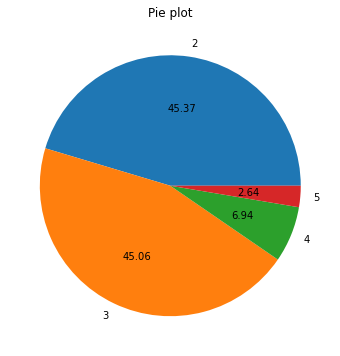

In [102]:
plt.figure(figsize=(6,6))
v=[2,3,4,5]
plt.pie(bangalore_properties['BHK'].value_counts(),autopct='%.2f',labels=v)
plt.title('Pie plot')
plt.show()

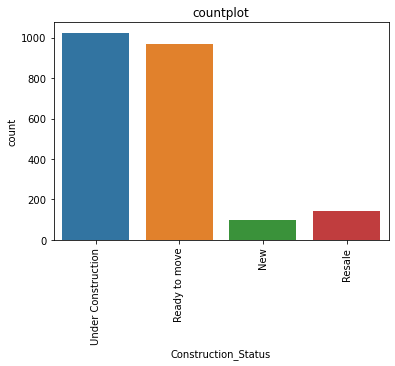

In [103]:
plt.xticks(rotation=90)
sns.countplot('Construction_Status',data=bangalore_properties)
plt.title('countplot')
plt.show()

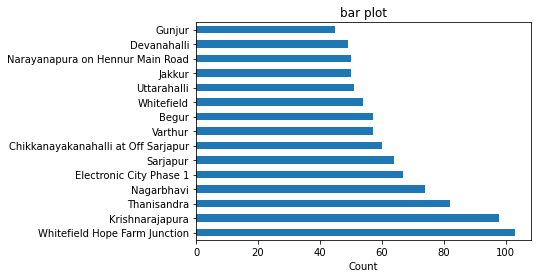

In [104]:
plt.xlabel('Count')
bangalore_properties['Location'].value_counts()[:15].plot(kind='barh')
plt.title('bar plot')

plt.show()

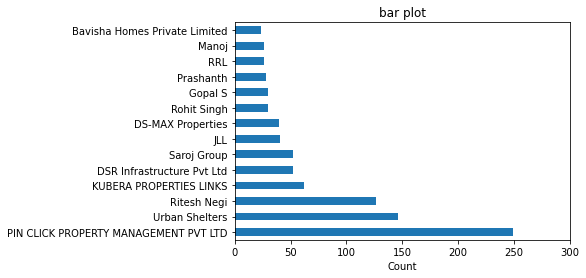

In [229]:
plt.xlabel('Count')
bangalore_properties['Builder'].value_counts()[1:15].plot(kind='barh')
plt.xlim([0,300])
plt.title('bar plot')
plt.show()

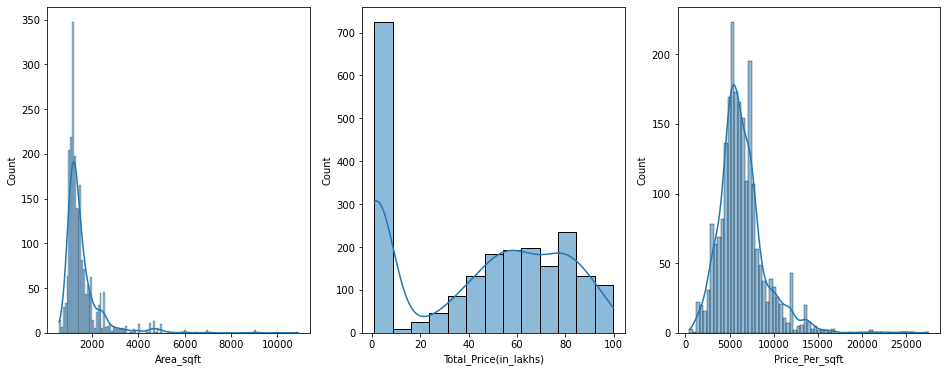

In [106]:
fig,axs=plt.subplots(figsize=(16,6),ncols=3)
sns.histplot(x='Area_sqft',data=bangalore_properties,kde=True,ax=axs[0])
sns.histplot(x='Total_Price(in_lakhs)',data=bangalore_properties,kde=True,ax=axs[1])
sns.histplot(x='Price_Per_sqft',data=bangalore_properties,kde=True,ax=axs[2])
plt.show()

In [107]:
bangalore_properties.pivot_table(bangalore_properties,index=['BHK','Construction_Status'])

Area_sqft  Price_Per_sqft  Total_Price(in_lakhs)
BHK Construction_Status                                                    
2   Ready to move        1165.348837     5638.742072              54.178985
    Under Construction   1122.933457     6362.776340              59.769150
3   New                  1593.061224     3784.173469              44.247551
    Ready to move        1707.399433     6659.138810              37.436062
    Resale               1703.409722     5690.743056              33.374306
    Under Construction   1577.621359     7400.162621              36.303398
4   Ready to move        2881.637363     7566.032967              18.680440
    Under Construction   2581.390625     8434.250000               5.197500
5   Ready to move        4469.519231     7223.865385               7.853462
    Under Construction   2385.714286     4476.714286              47.757143

## Bi - Variate

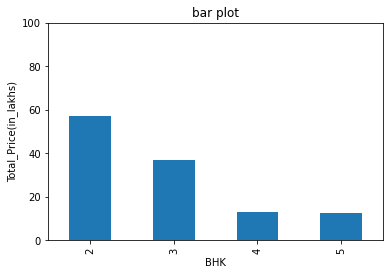

In [239]:
plt.ylabel('Total_Price(in_lakhs)')
bangalore_properties.groupby(by='BHK')['Total_Price(in_lakhs)'].mean().plot(kind='bar')
plt.ylim([0,100])
plt.title('bar plot')
plt.show()

In [109]:
z=bangalore_properties.select_dtypes(include='number').columns
z

Index(['BHK', 'Area_sqft', 'Price_Per_sqft', 'Total_Price(in_lakhs)'], dtype='object')

In [110]:
num_col=z.drop(['BHK']).tolist()
num_col

['Area_sqft', 'Price_Per_sqft', 'Total_Price(in_lakhs)']

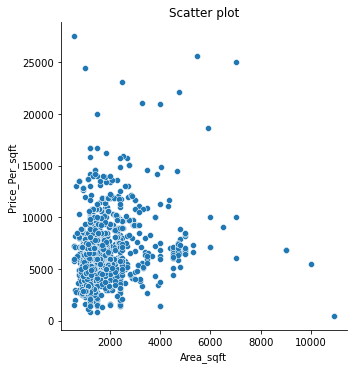

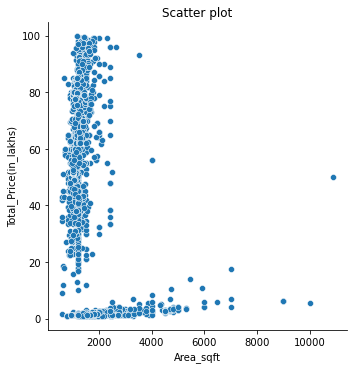

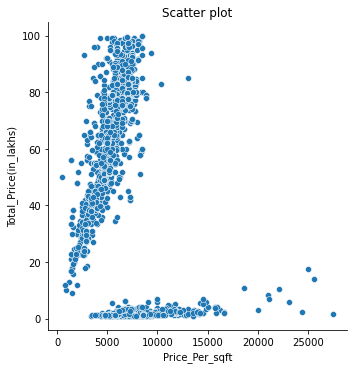

In [111]:
for col1 in range(len(num_col)):
    for col2 in range(col1+1,len(num_col)):
        sns.relplot(x=bangalore_properties[num_col[col1]],y=bangalore_properties[num_col[col2]],dashes=True)
        plt.title('Scatter plot')
        plt.show()

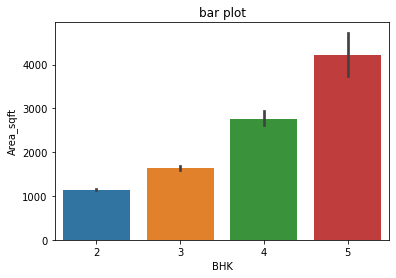

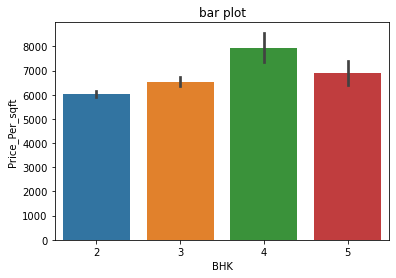

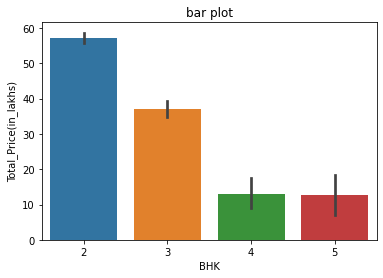

In [112]:
for j in range(len(num_col)):
    sns.barplot(x='BHK',y=bangalore_properties[num_col[j]],data=bangalore_properties)  
    plt.title('bar plot')
    plt.show()
    

In [ ]:
Observation :
        ->  As the number of BHK incerases the price per sqft  increases
        

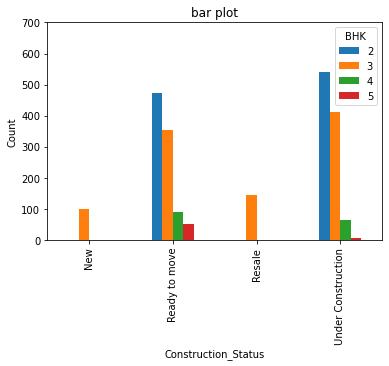

In [113]:
pd.crosstab(bangalore_properties['Construction_Status'],bangalore_properties['BHK']).plot(kind='bar')
plt.title('bar plot')
plt.ylabel('Count')
plt.ylim([0,700])
plt.show()


## Multi - Variate

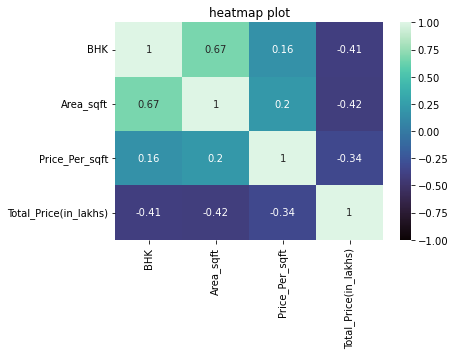

In [173]:
sns.heatmap(bangalore_properties.corr(),vmin=-1,vmax=1,annot=True,cmap='mako')
plt.title('heatmap plot')
plt.show()

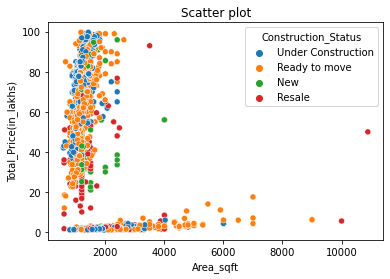

In [115]:
sns.scatterplot('Area_sqft','Total_Price(in_lakhs)',data=bangalore_properties,hue='Construction_Status')
plt.title('Scatter plot')
plt.show()

In [208]:
bangalore_properties.groupby(by=['BHK','Construction_Status'])['Total_Price(in_lakhs)'].min()

BHK  Construction_Status
2    Ready to move          1.00
     Under Construction     1.00
3    New                    1.10
     Ready to move          1.00
     Resale                 1.10
     Under Construction     1.00
4    Ready to move          1.04
     Under Construction     1.20
5    Ready to move          1.10
     Under Construction     1.05
Name: Total_Price(in_lakhs), dtype: float64

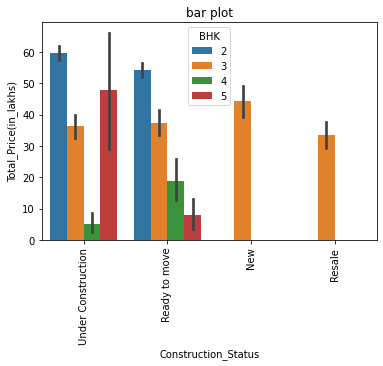

In [117]:
plt.xticks(rotation=90)
sns.barplot(x='Construction_Status',y='Total_Price(in_lakhs)',hue='BHK',data=bangalore_properties)
plt.title('bar plot')
plt.show()

In [152]:
construction_status=(input("Enter the construction status (New , Resale , Ready to move , Under Construction) : "))
minimum_price=float(input("Enter the minimum Total_Price(in lakhs) : "))
miximum_price=float(input("Enter the  Total_Price(in lakhs) : "))
bangalore_flats[(bangalore_flats['Construction_Status']==construction_status) & (bangalore_flats['Total_Price(in_lakhs)']>=minimum_price) & (bangalore_flats['Total_Price(in_lakhs)']<=miximum_price)].head(10)

Enter the construction status (New , Resale , Ready to move , Under Construction) : New
Enter the minimum Total_Price(in lakhs) : 10
Enter the  Total_Price(in lakhs) : 50


,Builder,BHK,Area_sqft,Price_Per_sqft,Total_Price(in_lakhs),Location,Construction_Status
13,Ambika Developers,3,1350,2349,31.71,Devanahalli,New
15,Saroj Ventures,3,2000,1615,32.30,Karudabande Hosahalli,New
16,Guru Punvaanii Properties,3,1500,2000,30.00,Anekal City,New
48,Ambika Developers,3,1350,2349,31.71,Devanahalli,New
50,Saroj Ventures,3,2000,1615,32.30,Karudabande Hosahalli,New
51,Guru Punvaanii Properties,3,1500,2000,30.00,Anekal City,New
82,Ambika Developers,3,1380,2349,32.41,Devanahalli,New
84,Saroj Ventures,3,1500,1639,24.59,Karudabande Hosahalli,New
85,Guru Punvaanii Properties,3,2400,2000,48.00,Anekal City,New
89,Nayak Developers,3,1500,1400,21.00,Devanahalli,New


# Conclusion :